In [1]:
import copy
import os

import IPython
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

from tomato.audio.audioanalyzer import AudioAnalyzer


# Audio segment

For demonstration purposes, we picked a short audio segment from XX music tradition. More info XX.

You can listen to the audio below:

In [2]:
audio_file = os.path.join("data", "Zingibar.wav")
IPython.display.Audio(audio_file)

# Analyze audio segment

`tomato` comes up with implementations of numerous audio analysis methods. Several of these methods are not relevant to the audio (e.g. *makam recognition* because it's trained on Turkish makams instead of Arabic) or applicable (e.g. tonic identification, which does not work on short segments). For an example analysis of a complete audio recording, please refer to the [audio analysis demo notebook](https://github.com/sertansenturk/tomato/blob/master/demos/audio_analysis_demo.ipynb) in *tomato*.

Below we use a few of these algorithms to extract the features of interest, namely:

- Predominant melody
- Pitch distribution
- Pitch class distribution

We also extract the peaks of the *pitch distribution*, which depict the *stable pitches* performed in the audio.

In [3]:
analyzer = AudioAnalyzer()
audio_features = dict()

# predominant melody extraction
predominant_melody = analyzer.extract_pitch(audio_file)
predominant_melody = analyzer.filter_pitch(predominant_melody)

# pitch and pitch-class distribution computation
pitch_distribution = analyzer.compute_pitch_distribution(predominant_melody)

pitch_class_distribution = copy.deepcopy(pitch_distribution)
pitch_class_distribution.to_pcd()

# stable pitches
stable_pitches = pitch_distribution.bins[pitch_distribution.detect_peaks()[0]]

# Plot features

Below we plot the predominant melody and pitch distribution side by side.



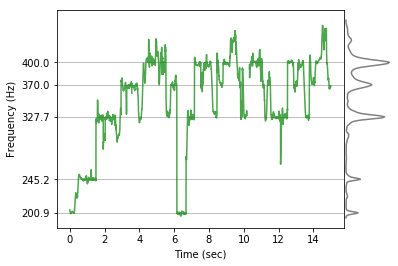

In [4]:
# create figure
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1])
ax1 = fig.add_subplot(gs[0])  # pitch
ax2 = fig.add_subplot(gs[1], sharey=ax1)  # pitch distribution
fig.subplots_adjust(hspace=0, wspace=0)

# plot pitch
pitch = np.array(predominant_melody['pitch'])
pitch[pitch[:, 1] == 0, 1] = np.nan
ax1.plot(pitch[:, 0], pitch[:, 1], 'g', label='Pitch', alpha=0.7)

ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Frequency (Hz)')
ax1.yaxis.grid(True)

# plot pitch distribution
ax2.plot(pitch_distribution.vals, pitch_distribution.bins, color='gray')
ax2.set_yticks(stable_pitches)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.axis('off')

plt.show()